In [1]:
import pandas as pd
from src.system import System
from src.sampler import MCMCSampler
from src.model import *
from src.priors import *
from src.results import *
import corner.corner as corner
import matplotlib.pyplot as plt

In [2]:
df1_data = {'App Mag': [14.23, 14.10], 
            'Errors': [0.36, 0.39], 
            'Filter': ['K', 'H']}
df1 = pd.DataFrame(df1_data)
df1

,App Mag,Errors,Filter
0,14.23,0.36,K
1,14.10,0.39,H


In [3]:
s = System(df1, 41.4741, 0.0211)
s.sys_priors

[UniformPrior(minval=0.2, maxval=1.3),
 UniformPrior(minval=0.0, maxval=15640000000.0),
 GaussianPrior(mu=41.4741, sigma=0.0211, no_negatives=True)]

In [10]:
sampler = MCMCSampler(s, num_threads=5, num_temps=4, num_walkers=200, table_type='WD', filters=['K', 'H'])

In [11]:
sampler.curr_pos.shape

(4, 200, 3)

In [12]:
sampler.run_sampler(100000, 100, 2, "trial3-inf.hdf5")

Starting Burn in
100/100 steps of burn-in complete
Burn in complete. Sampling posterior now.
100000/100000 steps completed
Run complete


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 760x760 with 9 Axes>]

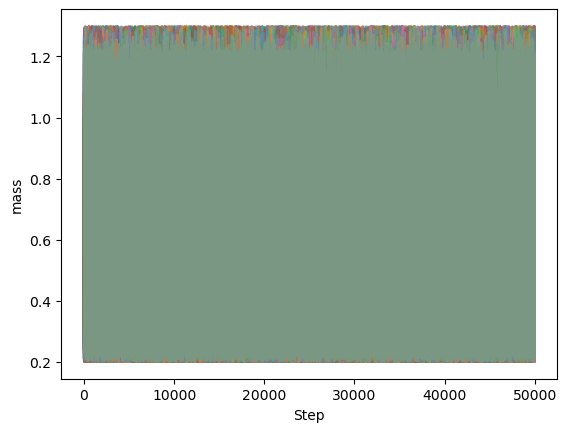

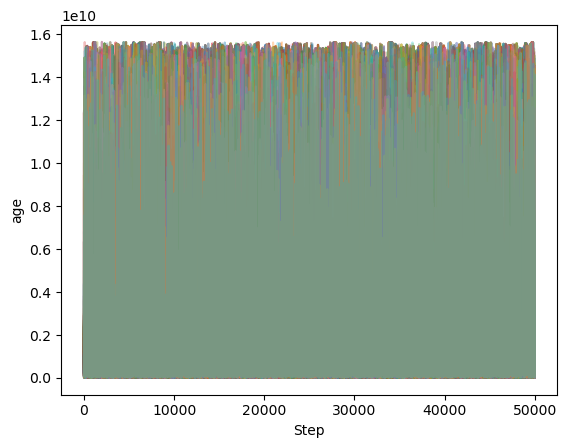

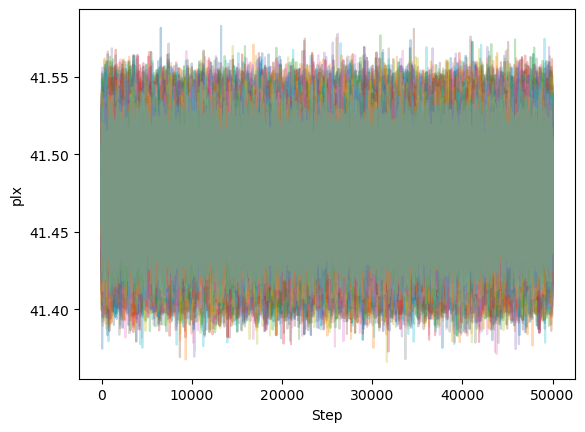

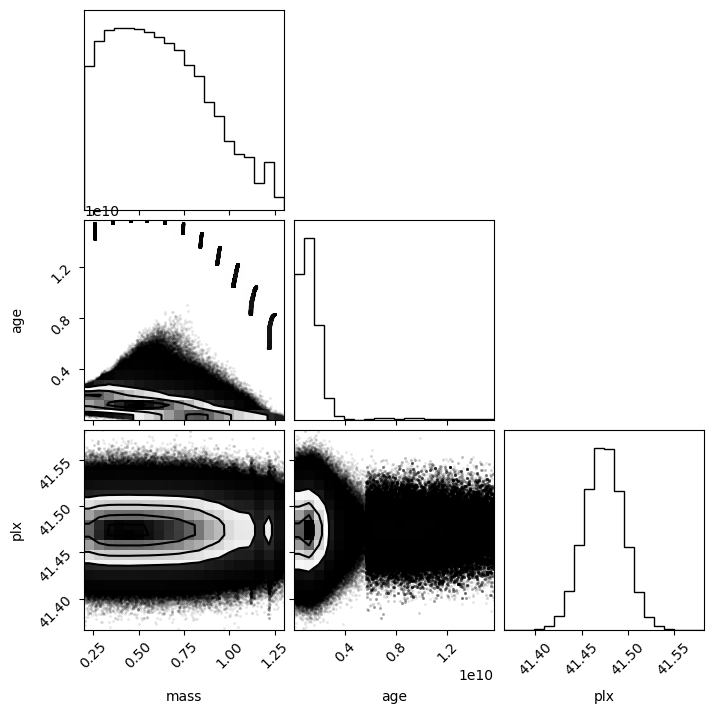

In [13]:
sampler.examine_chains(transparency=0.3)

In [5]:
res = Results(s)
res.load_results("trial3-inf.hdf5")

In [7]:
res.post

array([[5.23936839e-01, 4.95704141e+08, 4.14684302e+01],
       [6.62857469e-01, 1.31396471e+09, 4.14379135e+01],
       [5.93529388e-01, 8.46040836e+08, 4.14197172e+01],
       ...,
       [2.42135005e-01, 1.90595091e+09, 4.15124459e+01],
       [4.69558889e-01, 1.38132237e+09, 4.15034260e+01],
       [7.52854906e-01, 4.46729577e+08, 4.14629821e+01]])

C:\Users\ziyya\AppData\Local\Temp\ipykernel_16472\3891834487.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_steps = np.int(total_samples/200)


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 760x760 with 9 Axes>]

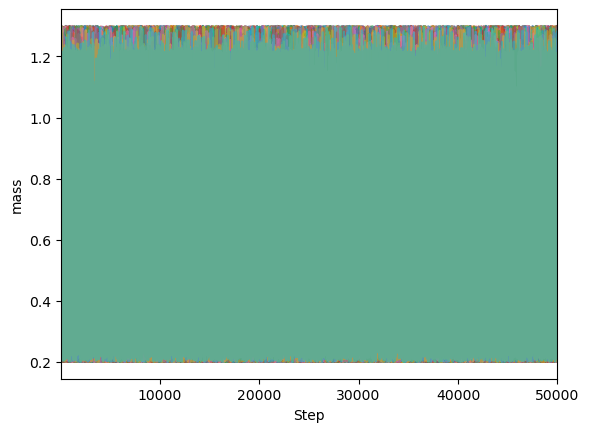

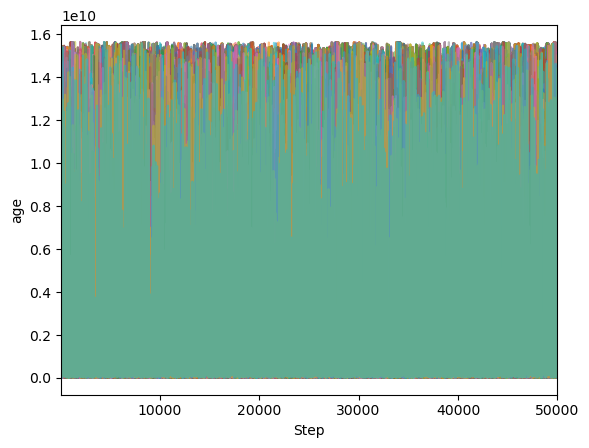

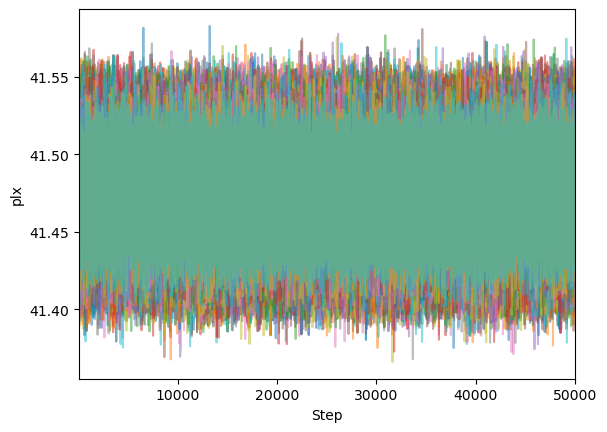

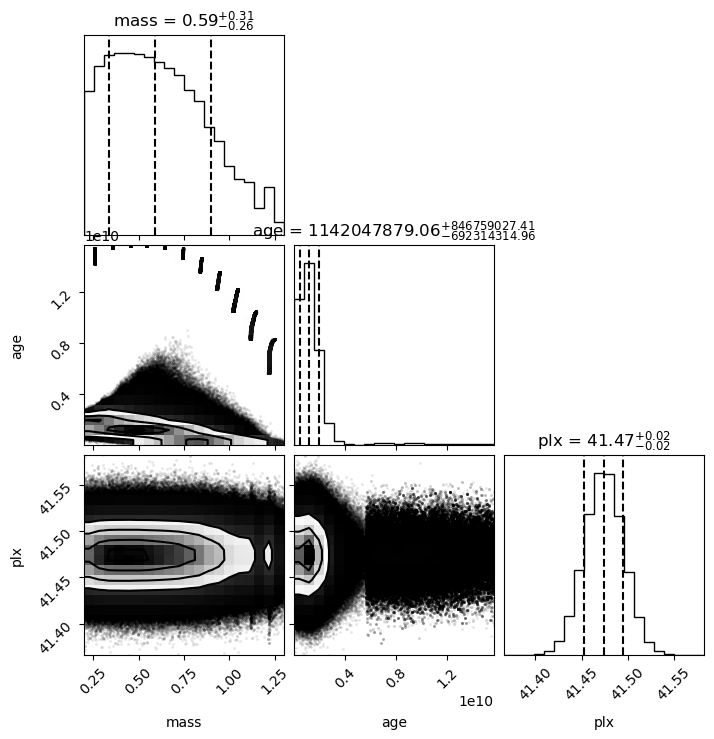

In [6]:
# removed brun-in
flatchain = np.copy(res.post)
total_samples, n_params = flatchain.shape
n_steps = np.int(total_samples/200) 
# Reshape it to (nwalkers, nsteps, nparams)
chn = flatchain.reshape((200, n_steps, n_params))
param_list = s.labels
step_range = (100, 50000)

# Get list of walkers to use
walkers_to_plot = np.arange(200)

# Get list of parameters to use
params_to_plot = np.arange(n_params)

# Loop through each parameter and make plot
output_figs = []
for pp in params_to_plot:
    fig, ax = plt.subplots()
    for ww in walkers_to_plot:
        ax.plot(chn[ww, :, pp], alpha = 0.5)
    ax.set_ylabel(s.labels[pp])
    ax.set_xlabel('Step')
    if step_range is not None:  # Limit range shown if step_range is set
        ax.set_xlim(step_range)
    output_figs.append(fig)
figure = corner(flatchain, labels=s.labels, quantiles=[0.16,0.5,0.84], show_titles=True)
output_figs.append(figure)
output_figs

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 760x760 with 9 Axes>]

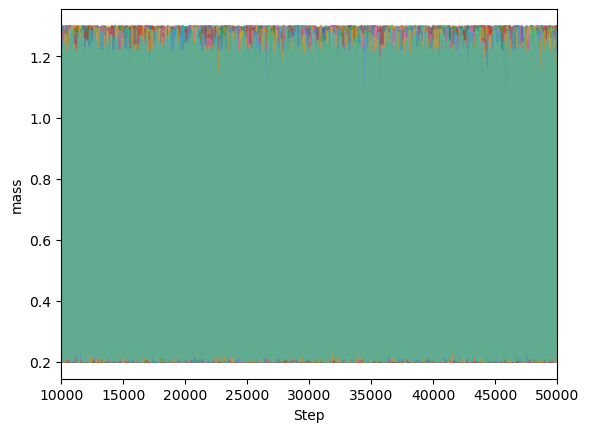

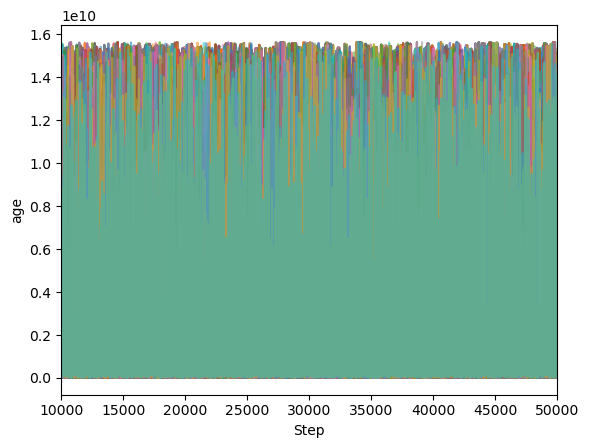

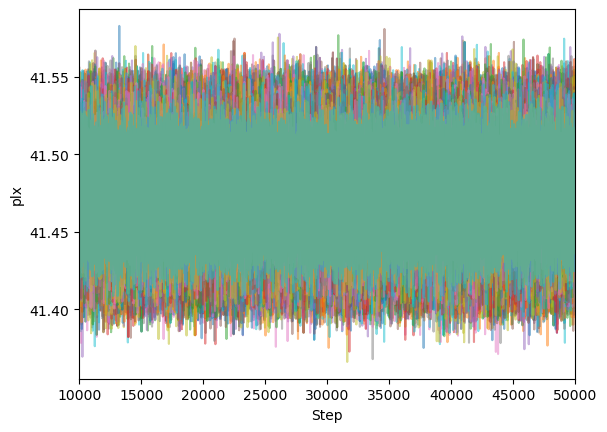

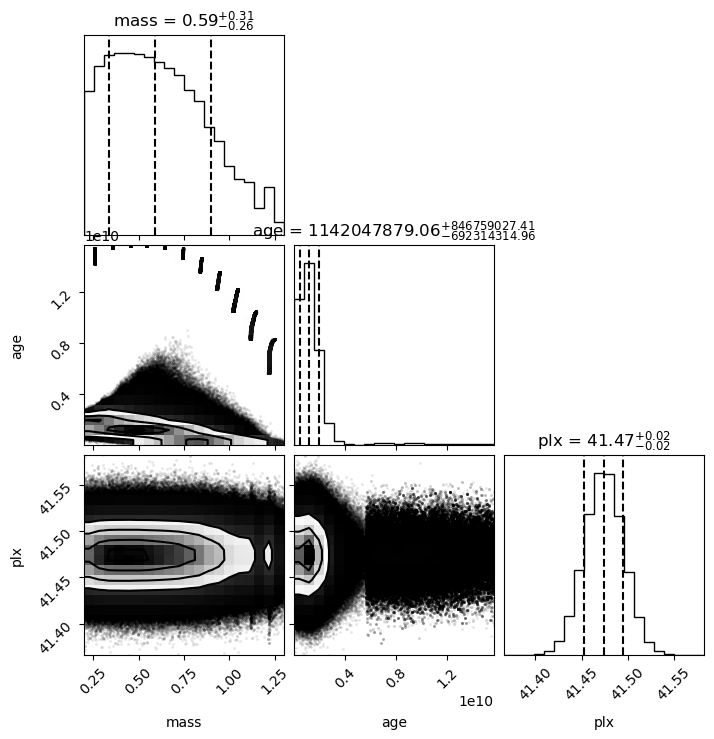

In [7]:
# 10000 - 50000
step_range = (10000, 50000)
output_figs = []
for pp in params_to_plot:
    fig, ax = plt.subplots()
    for ww in walkers_to_plot:
        ax.plot(chn[ww, :, pp], alpha = 0.5)
    ax.set_ylabel(s.labels[pp])
    ax.set_xlabel('Step')
    if step_range is not None:  # Limit range shown if step_range is set
        ax.set_xlim(step_range)
    output_figs.append(fig)
figure = corner(flatchain, labels=s.labels, quantiles=[0.16,0.5,0.84], show_titles=True, range=0.95)
output_figs.append(figure)
output_figs